# Import

In [17]:
from MESA import *
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification

In [18]:
def plot_ROC(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)    
    plt.show()

# Create random datasets for testing

In [62]:
dataset1, label = make_classification(n_samples=20,
                                    n_features=40,
                                    n_informative=30,
                                    n_redundant=1,
                                    random_state=0,
                                    shuffle=False)
dataset2, label_ = make_classification(n_samples=20,
                                    n_features=40,
                                    n_informative=20,
                                    n_redundant=8,
                                    random_state=0,
                                    shuffle=False)

In [64]:
dataset1 = pd.DataFrame(dataset1,columns=['feature_' + str(_) for _ in range(40)],
                        index=[('Cancer' if _==1 else 'Normal') for _ in label]).T
dataset2 = pd.DataFrame(dataset2,columns=['feature_' + str(_) for _ in range(40)],
                        index=[('Cancer' if _==1 else 'Normal') for _ in label]).T

In [67]:
dataset1.head()

,Normal,Normal,Normal,Normal,Normal,Cancer,Cancer,Cancer,Cancer,Cancer,Normal,Normal,Normal,Normal,Normal,Cancer,Cancer,Cancer,Cancer,Cancer
feature_0,-2.657438,0.250462,-6.316733,-0.183008,-3.157091,-0.373797,-1.271039,-1.655216,2.316599,-2.708390,-3.514962,-0.636650,-2.301711,-0.555753,3.657662,0.797684,-1.345706,-4.046547,0.323794,5.727181
feature_1,-4.047969,0.059135,12.176013,2.180394,-1.959148,7.983654,4.252196,-4.331032,3.810289,0.977776,-0.197668,7.882415,4.299040,-2.233456,1.555099,-1.260301,5.317385,0.997258,4.693458,1.638596
feature_2,0.336807,2.574391,1.643657,2.056295,-2.111729,-3.422055,-1.489284,-0.688571,-0.449130,-1.067020,-0.043363,-0.856425,-1.341088,1.084733,6.465461,1.609761,2.851012,6.886433,-5.484811,0.894754
feature_3,2.617077,1.375779,2.223775,1.451959,1.754885,4.093960,3.859569,0.435443,4.673766,1.010637,2.421923,5.816843,-3.427341,-5.362654,0.817183,-0.067298,-6.467959,-6.892887,-1.956304,0.193378
feature_4,-8.929103,5.587176,-1.891227,7.925671,0.886867,3.427853,8.519712,-3.558961,1.644851,-0.283583,1.569537,0.003211,-1.846819,1.642075,-5.320329,-0.843546,-5.943937,-3.330491,-0.213274,4.349994


In [68]:
dataset2.head()

,Normal,Normal,Normal,Normal,Normal,Cancer,Cancer,Cancer,Cancer,Cancer,Normal,Normal,Normal,Normal,Normal,Cancer,Cancer,Cancer,Cancer,Cancer
feature_0,-0.602556,3.643032,3.037892,-1.109481,2.385997,-5.984252,-2.916217,1.923783,-0.342886,-0.208612,1.133495,0.177237,0.658569,0.143992,-2.691958,-2.962459,1.106371,-0.519772,-2.737600,2.896222
feature_1,5.912015,4.584149,0.131728,-2.882158,5.968676,2.285868,-0.926496,1.840909,-0.130376,-1.320260,3.914576,-1.048612,5.839853,2.979434,2.506142,-0.443105,1.252658,-1.382861,-4.003773,-3.995266
feature_2,-3.712827,2.349710,-1.674970,6.494007,-0.958747,-4.429147,-2.819524,-1.717120,-0.549012,-0.380938,-2.246815,2.602718,-1.787210,2.916498,3.777609,-0.087982,0.793247,-4.773273,-0.976853,-3.822507
feature_3,-0.249867,-2.310414,0.478615,0.945218,-2.274545,1.600593,-2.064119,1.653003,1.510509,0.423255,-1.516784,-1.658048,-1.392895,-1.889464,1.077493,3.039729,-7.109191,-1.954977,4.625182,-3.502716
feature_4,-2.576757,3.888342,2.090072,-3.132203,-2.847686,-1.642812,2.669854,-2.681256,1.341412,5.071602,-1.507957,3.669974,-2.416891,4.494471,4.878578,0.287927,-0.834164,2.106695,-0.603902,0.547497


# Run MESA

## Single modality

In [69]:
random_state = 0
# Train-test split inside SBS
cv_sbs = StratifiedKFold(n_splits=3, random_state=random_state, shuffle=True)
# Classifiers used for final evaluation on test sets
svm = SVC(kernel="linear", random_state=random_state, probability=True)
rf = RandomForestClassifier(random_state=random_state, n_jobs=-1)

In [70]:
mesa_result_1 = MESA_single(
    X=dataset1,
    y=label,
    estimator=svm,
    cv=cv_sbs,
    classifiers=[svm, rf],
    min_feature=25,
    boruta_top_n_feature=30,
)

=============== No. 1  LOO iteration ===============
Best combination: (27, 9, 36, 29, 6, 19, 37, 39, 14, 31, 35, 8, 28, 22, 33, 23, 1, 3, 17, 38, 2, 13, 32, 21, 10)
Best score: 1.0
Best dimension: 25
=============== No. 2  LOO iteration ===============
Best combination: (39, 27, 36, 9, 7, 37, 22, 20, 15, 19, 13, 8, 6, 31, 35, 23, 29, 3, 38, 17, 34, 21, 2, 0, 4)
Best score: 1.0
Best dimension: 25
=============== No. 3  LOO iteration ===============
Best combination: (27, 20, 36, 9, 30, 39, 7, 22, 37, 33, 23, 35, 8, 6, 3, 29, 15, 38, 13, 1, 24, 31, 32, 19, 11)
Best score: 1.0
Best dimension: 25
=============== No. 4  LOO iteration ===============
Best combination: (27, 36, 8, 9, 20, 7, 30, 22, 6, 37, 39, 28, 15, 31, 3, 29, 0, 19, 35, 33, 23, 17, 1, 32, 13)
Best score: 1.0
Best dimension: 25
=============== No. 5  LOO iteration ===============
Best combination: (27, 9, 36, 20, 30, 8, 37, 39, 7, 6, 22, 29, 35, 28, 2, 3, 23, 15, 31, 17, 19, 25, 13, 10, 12)
Best score: 1.0
Best dimension: 2

In [79]:
#AUC
print('AUC of dataset 1[SVM, RF]: %s' % mesa_result_1[-1])

AUC of dataset 1[SVM, RF]: [0.76, 0.7849999999999999]


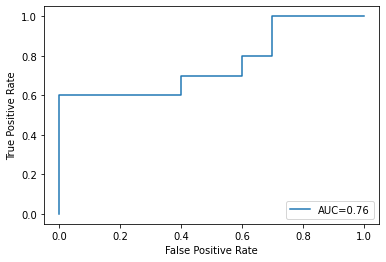

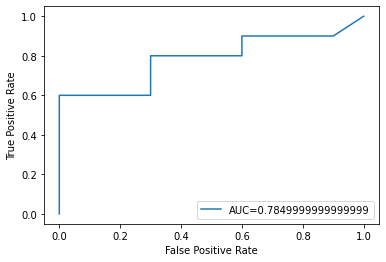

In [80]:
# ROC curve for SVM classifier
plot_ROC(mesa_result_1[1],mesa_result_1[2][0])
# ROC curve for RandomForest classifier
plot_ROC(mesa_result_1[1],mesa_result_1[2][1])

In [73]:
mesa_result_2 = MESA_single(
    X=dataset2,
    y=label,
    estimator=svm,
    cv=cv_sbs,
    classifiers=[svm, rf],
    min_feature=25,
    boruta_top_n_feature=30,
)

=============== No. 1  LOO iteration ===============
Best combination: (1, 17, 8, 31, 26, 15, 24, 33, 9, 2, 35, 23, 20, 3, 36, 37, 28, 19, 21, 0, 32, 10, 30, 27, 25)
Best score: 1.0
Best dimension: 25
=============== No. 2  LOO iteration ===============
Best combination: (31, 1, 17, 9, 8, 33, 26, 3, 32, 15, 2, 19, 36, 35, 12, 24, 20, 23, 38, 30, 21, 28, 0, 10, 13)
Best score: 0.9259259259259259
Best dimension: 25
=============== No. 3  LOO iteration ===============
Best combination: (1, 23, 17, 31, 9, 8, 33, 36, 2, 3, 35, 19, 15, 24, 4, 30, 28, 29, 6, 38, 10, 12, 7, 25, 37)
Best score: 1.0
Best dimension: 25
=============== No. 4  LOO iteration ===============
Best combination: (1, 31, 17, 9, 23, 24, 19, 28, 32, 3, 8, 36, 35, 15, 2, 37, 33, 30, 38, 20, 7, 6, 4, 12, 39)
Best score: 0.9629629629629629
Best dimension: 25
=============== No. 5  LOO iteration ===============
Best combination: (1, 17, 2, 23, 31, 9, 26, 33, 35, 12, 15, 36, 19, 24, 8, 3, 30, 0, 7, 37, 4, 38, 13, 20, 5)
Best sc

In [81]:
#AUC
print('AUC of dataset 2 [SVM, RF]: %s' % mesa_result_2[-1])

AUC of dataset 2 [SVM, RF]: [0.67, 0.665]


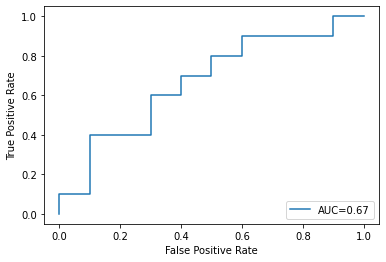

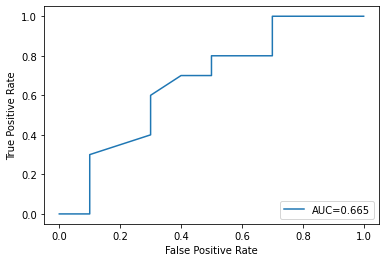

In [82]:
# ROC curve for SVM classifier
plot_ROC(mesa_result_2[1],mesa_result_2[2][0])
# ROC curve for RandomForest classifier
plot_ROC(mesa_result_2[1],mesa_result_2[2][1])

## Multimodality

In [76]:
mesa_multimodal = MESA_integration(
    X_list=[dataset1, dataset2],
    y=label,
    feature_selected=[mesa_result_1[0], mesa_result_2[0]],
    classifiers=[svm, rf]
)

In [77]:
# Multimodal AUC
#AUC
print('AUC of multimodal integration [SVM, RF]: %s' % mesa_multimodal[-1])

AUC of multimodal integration: [0.9, 0.72]


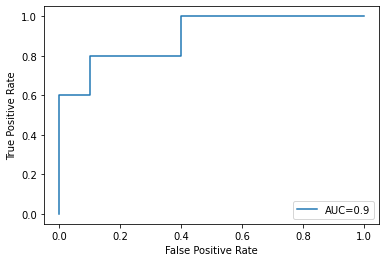

In [85]:
# ROC curve for SVM classifier
plot_ROC(mesa_multimodal[0],mesa_multimodal[1][0])
# ROC curve for RandomForest classifier
#plot_ROC(mesa_multimodal[0],mesa_multimodal[1][1])

## Let's plot them together

We can see that the prediction accuaracy/AUC increased dramatically as it took informatic features from both datasets after integration

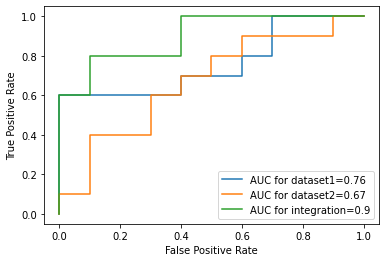

In [90]:
fpr, tpr, _ = roc_curve(mesa_result_1[1],mesa_result_1[2][0])
auc = roc_auc_score(mesa_result_1[1],mesa_result_1[2][0])
plt.plot(fpr,tpr,label="AUC for dataset1="+str(auc))

fpr, tpr, _ = roc_curve(mesa_result_2[1],mesa_result_2[2][0])
auc = roc_auc_score(mesa_result_2[1],mesa_result_2[2][0])
plt.plot(fpr,tpr,label="AUC for dataset2="+str(auc))

fpr, tpr, _ = roc_curve(mesa_multimodal[0],mesa_multimodal[1][0])
auc = roc_auc_score(mesa_multimodal[0],mesa_multimodal[1][0])
plt.plot(fpr,tpr,label="AUC for integration="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4) 
plt.show()